# **STINTSY S11 Group 1 Major Course Output**
Members:<br>
Andres, Donielle<br>
Limjoco, Jared Ethan<br>
Quinzon, Christopher Josh<br>
Uy, Shane Owen

## **Section 1: Introduction to the problem/task and dataset**

The garment industry plays a crucial role in today's industrial globalization as this labor-intesive sector relies heavily manual processes and in order to meet the global demands for clothing and textile products, the industry must ensure efficient production and delivery of the employees of garment manufacturing companies. Decision-makers or those of high positions in the garment industry makes this happen by systematically monitoring, analyzing, and predicting the productivity performance of the different teams that work within their factories. This makes it possible for companies in the industry to gain a competitive advantage in the market. <br><br>

In order to systematically monitor, analyze, and predict the productivity performance of the teams in factories, a comprehensive dataset has been built, covering important attributes related to the garment manufacturing process and the productivity of employees. This dataset serves as a valuable resource for researchers, data scientists, and industry professionals to understand the industry on a deeper level by looking at different factors contributing to the productivity of the industry. <br><br>

This project's primary objective is to predict and analyze the productivity performance of working teams in garment manufacturing companies. The target of this project is to develop models and generate insights that can predict the productivity of the teams in the garment industry based on the provided attributes. Being able to do so will greatly help decision-makers to make data-driven decision to improve the overall efficiency and competitiveness of their garment manufacturing operations

<br><br>
To be more specific, the objective of this project is to predict and analyze the productivity performance of working teams, considering the incentives given to them. 
- Which team was the most productive on Mondays and Fridays per Quarter
- Which team was able to reach their target productivity based on the actual productivity

## **Section 2: Description of the dataset**

The Garment Dataset was compiled to assess the production of the garment company by analyzing the productivity of employees across various departments. The data was sourced from the data analysis of the performance records of the Garment Company, extracting information related to garment productions and the actual productivity rate compared to the targeted productivity rate. A similar study by Balla et al. (2021), utilized Machine Learning techniques to be able to predict the productivity rate of garment employees based on the Garment Dataset by analyzing and identifying the patterns that are not apparent in statistical methods. The insights from this study can potentially enhance the efficiency of garment workers, leading to a boost in the overall profitability of the clothing industry. 
<br><br>
The Garment Dataset used consists of 1197 instances and 15 features. The features include date, day, quarter, department, team (number), number of workers, number of style changes, targeted productivity, SMV, WIP, overtime, incentive, idle time, idle men, and actual productivity. Each instance in the dataset represents a specific garment team and includes values for each of the 15 features. Each feature is discussed below:

**Garments Features** <br>
- date – Date in MM-DD-YYYY
- quarter – A portion of the month. A month was divided into four quarters.
- department – Department associated with the instance.
- day – Day of the week
- team – Team number associated with the instance.
- targeted_productivity – Targeted productivity set by the authority for each team for each day.
- smv – Standard Minute Value; the allocated time for a task
- wip – Work in progress. Includes the number of unfinished items for products.
- over_time – Represents the amount of overtime by each team in minutes.
- incentive – Represents the amount of financial incentive that enables or motivates a particular course of action.
- idle_time – The amount of time when the production was interrupted due to several reasons.
- idle_men – The number of workers who were idle due to production interruption.
- no_of_style_change – Number of changes in the style of a particular product
- no_of_workers – Number of workers in each team
- actual_productivity – The actual % of productivity that was delivered by the workers. It ranges from 0-1.


## **Section 3: List of requirements**

List all the Python libraries and modules that you used.

In [3]:
# pandas dataframe
import pandas as pd

# numpy library
import numpy as np

# matplotlib & seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 
from sklearn import preprocessing, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from math import sqrt

from functions import compute_RMSE

## **Section 4: Data preprocessing and cleaning**

Perform the necessary steps before using the data. In this section of the notebook, please take note of the following: <br>

- If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification of the use of each preprocessing technique used in the project.
- Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There should be a correct and proper justification of the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study

In [4]:
df = pd.read_csv('garments.csv')

print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,01/01/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,01/01/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,01/01/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,01/01/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,01/01/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [5]:
df_copy = df

# remove null values
df_copy['wip'] = df_copy['wip'].fillna(0)
df_copy['wip'] = df_copy['wip'].astype(np.int64)

# replace misspelled words and remove whitespace
df_copy['department'] = df_copy['department'].str.replace('sweing', 'sewing')
df_copy['department'] = df_copy['department'].str.strip()

# replace no of workers from float to int
df_copy['no_of_workers'] = df_copy['no_of_workers'].astype(np.int64)

# sets values of actual productivity that are higher than 1% to 1%
df_copy['actual_productivity'] = np.where(df_copy['actual_productivity'] > 1.0, 1.0, df_copy['actual_productivity'])

# drop date column
df_copy = df.drop(columns = ['date'])

# encode quarter into numerals 
#(0 : Quarter 1, 1: Quarter 2, 2: Quarter 3, 3: Quarter 4)
label_enc = preprocessing.LabelEncoder()
label_enc.fit_transform(df_copy['quarter'])
df_copy['quarter'] = label_enc.transform(df_copy['quarter'])

#(0 : finishing, 1: sewing)
label_enc = LabelEncoder()
label_enc.fit_transform(df_copy['department'])
df_copy['department'] = label_enc.transform(df_copy['department'])

#(0: Monday, 1: Tues, 2: Wed, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday)
df_copy['day'] = label_enc.fit_transform(df['day'])


df_copy.head(1000)

# changes so far
# - removed null values from work in progress
# - replaced "sweing" misspelling to "sewing"
# - removed "Quarter 5" and changed it to "Quarter 4" | reverted this since the dataset actually has quarter 5 
# - replaced "number of workers" from float to int type
# - removed actual productivity values higher than 1% and changed it to 1%
# - dropped date column (since we are only looking at quarter and day of the week productivity)
# - label encoded quarters into numerals 

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,0,0,3,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,0,1,3,11,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
3,0,1,3,12,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
4,0,1,3,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,2,2,0.70,30.33,254,1800,0,0.0,0,0,58,0.683551
996,0,1,2,11,0.80,11.61,347,0,50,4.0,20,0,57,0.682433
997,0,0,2,4,0.60,3.94,0,960,0,0.0,0,0,8,0.673083
998,0,0,2,10,0.70,2.90,0,3360,0,0.0,0,0,8,0.664583


## **Section 5: Exploratory data analysis**

Perform exploratory data analysis comprehensively to gain a good understanding of your dataset. <br>In this section of the notebook, you must present relevant numerical summaries and
visualizations. Make sure that each code is accompanied by a brief explanation. The whole process should be supported with verbose textual descriptions of your procedures and findings.

The next part of this notebook involves performing Exploratory Data Analysis (EDA) in order to investigate, understand, and visualize the garments dataset. This part will include essential information on the format and metadata of the dataset, how the dataset was collected, relationships and visualizations of the features. 

### **Format and Metadata**
Each observation/row represents a set of attributes that may contribute to the overall productivity of a single group of workers under a department for a certain day and quarter.

In [6]:
df_copy.head(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,0,0,3,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,0,1,3,11,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
3,0,1,3,12,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
4,0,1,3,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
5,0,1,3,7,0.80,25.90,984,6720,38,0.0,0,0,56,0.800125
6,0,0,3,2,0.75,3.94,0,960,0,0.0,0,0,8,0.755167
7,0,1,3,3,0.75,28.08,795,6900,45,0.0,0,0,57,0.753683
8,0,1,3,2,0.75,19.87,733,6000,34,0.0,0,0,55,0.753098
9,0,1,3,1,0.75,28.08,681,6900,45,0.0,0,0,57,0.750428


###   **Data type  for Each Feature**

In [7]:
features_info = df_copy.dtypes.reset_index().rename(columns={0: 'data_type'})
features_info.columns = ['feature', 'data_type']

features_info

,feature,data_type
0,quarter,int32
1,department,int32
2,day,int32
3,team,int64
4,targeted_productivity,float64
5,smv,float64
6,wip,int64
7,over_time,int64
8,incentive,int64
9,idle_time,float64


### **Distribution of Different Features**
Showing the distribution of the features necessary for the objective of this notebook will allow us to see how the values of a certain feature are spread, arranged, or frequent, giving us a visual summary of the data and see some pattern/trend.

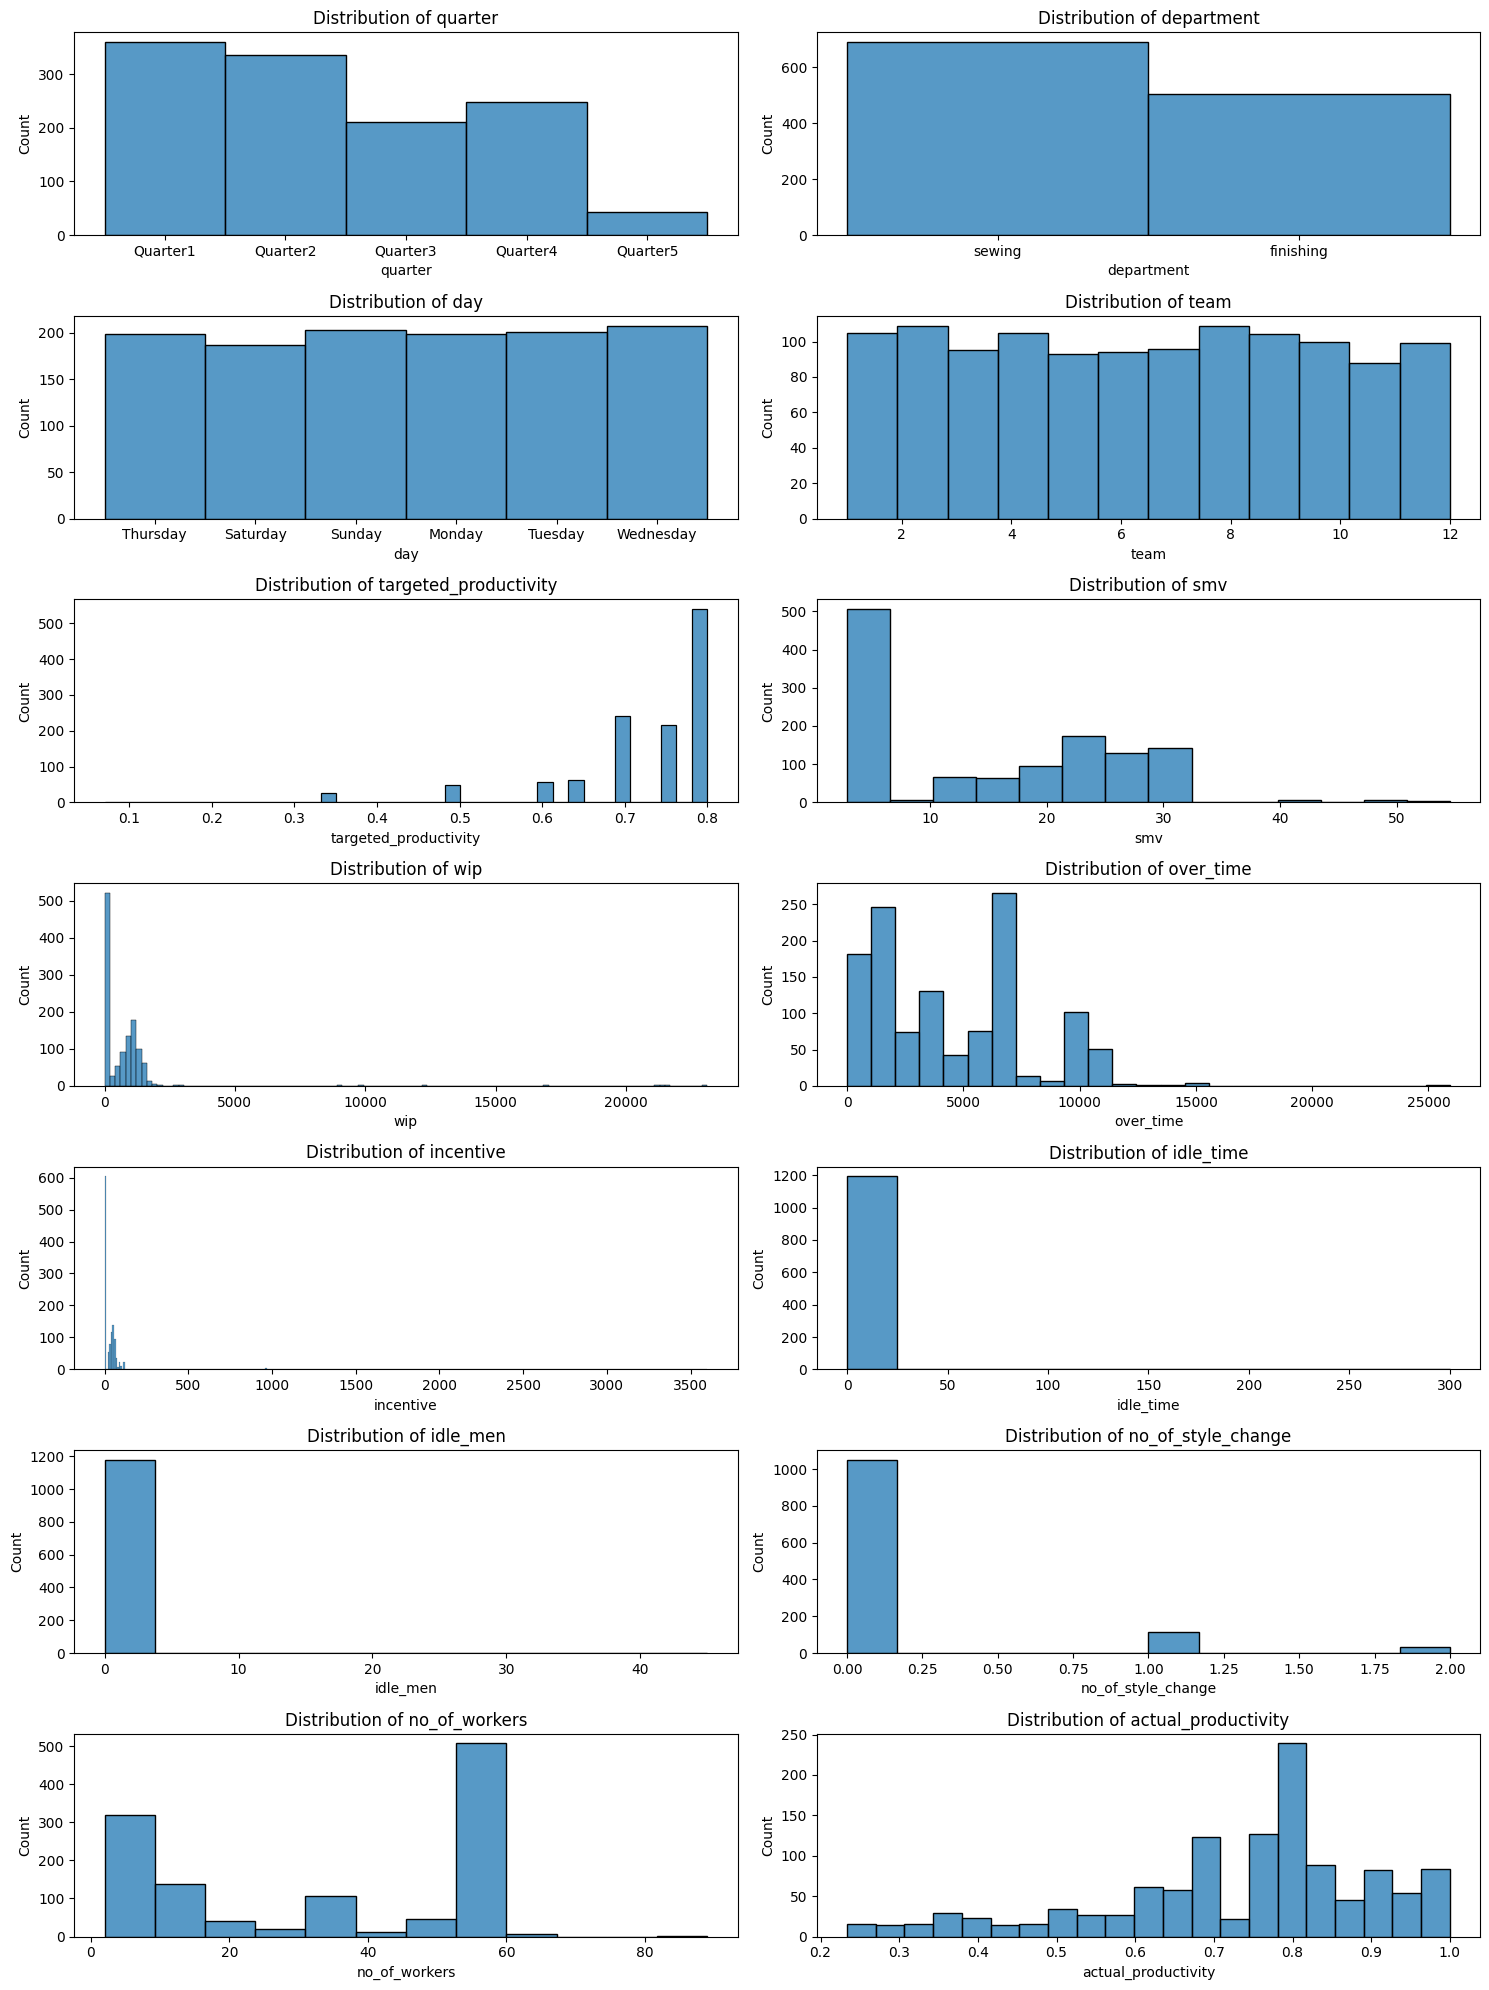

In [8]:
features = df_copy.columns.tolist()

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(df[feature], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}')

# If the number of features is odd, we remove the last subplot
if len(features) % 2 != 0:
    fig.delaxes(axs[row, col+1])

plt.tight_layout()
plt.show()

### **Checking for Outliers** <p>
Comment: not sure if we need to remove outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'quarter'),
  Text(1, 0, 'department'),
  Text(2, 0, 'day'),
  Text(3, 0, 'team'),
  Text(4, 0, 'targeted_productivity'),
  Text(5, 0, 'smv'),
  Text(6, 0, 'wip'),
  Text(7, 0, 'over_time'),
  Text(8, 0, 'incentive'),
  Text(9, 0, 'idle_time'),
  Text(10, 0, 'idle_men'),
  Text(11, 0, 'no_of_style_change'),
  Text(12, 0, 'no_of_workers'),
  Text(13, 0, 'actual_productivity')])

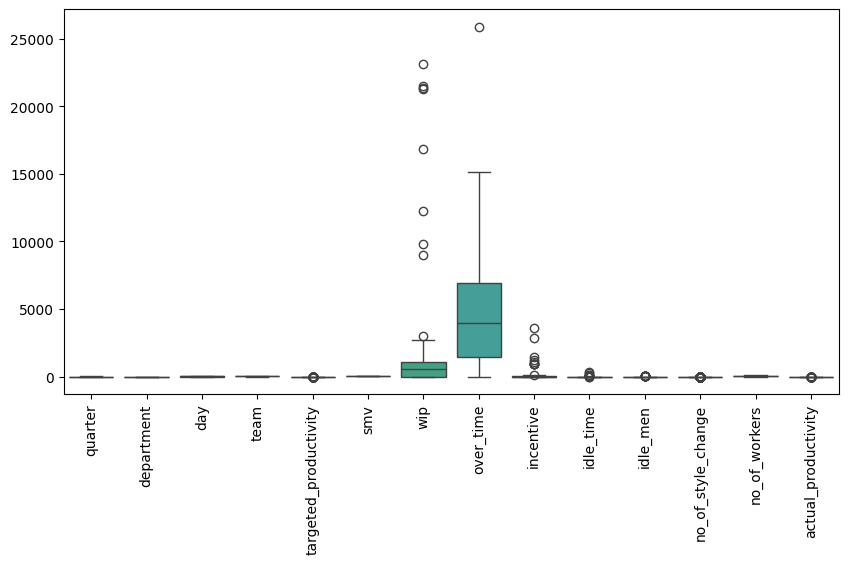

In [9]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df_copy, orient ='v',width=0.8)
plt.xticks(rotation=90)

### **Actual and Targeted Productivity over Quarter**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16212\3692645591.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_copy, x = "quarter", y = "actual_productivity", ci = None)


<Axes: xlabel='quarter', ylabel='actual_productivity'>

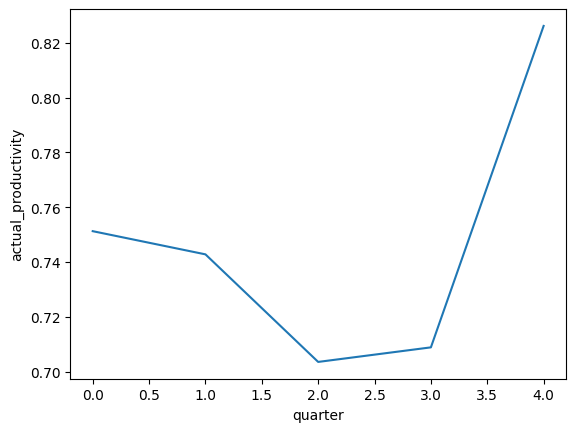

In [10]:
sns.lineplot(data = df_copy, x = "quarter", y = "actual_productivity", ci = None)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16212\2782349798.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_copy, x = "quarter", y = "targeted_productivity", ci = None)


<Axes: xlabel='quarter', ylabel='targeted_productivity'>

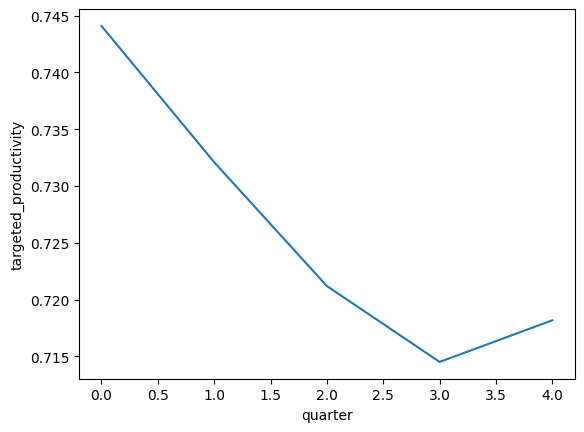

In [11]:
sns.lineplot(data = df_copy, x = "quarter", y = "targeted_productivity", ci = None)

### **Data Splitting**

<p>

Splitting the dataset into 70% Training Set and 30% Testing Set 

In [12]:
from sklearn.model_selection import train_test_split

x = df_copy.drop(['actual_productivity'], axis=1)
y = df_copy.actual_productivity

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42) 

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(837, 13)
(837,)
(360, 13)
(360,)


## **Section 6: Model training**

Use machine learning models to accomplish your chosen task for the dataset. In this section of the notebook, please take note of the following:
- The project should train and evaluate at least 3 different kinds of machine learning models.
- Each model should be appropriate in accomplishing the chosen task for the dataset. There should be a clear and correct justification on the use of each machine learning model.
- Make sure that the values of the hyperparameters of each model are mentioned. At the minimum, the optimizer, the learning rate, and the learning rate schedule should be discussed per model.
- The report should show that the models are not overfitting nor underfitting.

### **Model 1: Linear Regression**

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Using Linear Regression to know the relationship between the features to the actual productivity
# Using Lasso and Ridge to figure out which produces the Lowest RMSE
# Lasso is good for feature selection because it shrinks less important feature’s coefficient to zero (Reduces Overfitting)
# Ridge is good when you have more features than observations (Prevents Overfitting)

In [14]:
# Training using Linear Regression, Lasso, and Ridge

lr_model.fit(x_train, y_train)

LinearRegression()

In [15]:
# Predicting

lr_pred = lr_model.predict(x_test)

In [16]:
# LINEAR
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = compute_RMSE(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

print(f"LR Mean Absolute Error: {mae_lr}")
print(f"LR Mean Squared Error: {mse_lr}")
print(f"LR Root Mean Squared Error: {rmse_lr}")
print(f"LR R-squared: {r2_lr}")


LR Mean Absolute Error: 0.10972636236934882
LR Mean Squared Error: 0.023069138954235256
LR Root Mean Squared Error: 0.15188528221732103
LR R-squared: 0.21630036204351333


### **Lasso Regression**

In [17]:
lasso_model.fit(x_train, y_train)

Lasso()

In [18]:
lasso_pred = lasso_model.predict(x_test)

In [19]:
# LASSO
mae_lasso = mean_absolute_error(y_test, lasso_pred)
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = compute_RMSE(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)

print(f"Lasso Mean Absolute Error: {mae_lasso}")
print(f"Lasso Mean Squared Error: {mse_lasso}")
print(f"Lasso Root Mean Squared Error: {rmse_lasso}")
print(f"Lasso R-squared: {r2_lasso}")


Lasso Mean Absolute Error: 0.13020727529195308
Lasso Mean Squared Error: 0.02911951783628593
Lasso Root Mean Squared Error: 0.1706444192942914
Lasso R-squared: 0.010758241517503708


### **Ridge Regression**

In [20]:
ridge_model.fit(x_train, y_train)

Ridge()

In [21]:
ridge_pred = ridge_model.predict(x_test)

In [22]:
# RIDGE 
mae_ridge = mean_absolute_error(y_test, ridge_pred)
mse_ridge = mean_squared_error(y_test, ridge_pred)
rmse_ridge = compute_RMSE(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

print(f"Ridge Mean Absolute Error: {mae_ridge}")
print(f"Ridge Mean Squared Error: {mse_ridge}")
print(f"Ridge Root Mean Squared Error: {rmse_ridge}")
print(f"Ridge R-squared: {r2_ridge}")



Ridge Mean Absolute Error: 0.11075296568503909
Ridge Mean Squared Error: 0.023169545745159094
Ridge Root Mean Squared Error: 0.15221545829894903
Ridge R-squared: 0.2128893649598559


<font color='red'>**Comment:**</font> The Linear Regression model performs the best among the three. It has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating that it has the smallest average prediction error. Additionally, it has the highest R-squared value, suggesting that it explains more of the variance in the dependent variable. However, the R-squared value is still relatively low, indicating that the model could be improved further.

### **Model 2: Decision Tree Regressor**

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 42)

In [24]:
# Training
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
# Predicting

dt_pred = dt_model.predict(x_test)

In [26]:
# DECISION TREE
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = compute_RMSE(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)


print(f"DT Mean Absolute Error: {mae_dt}")
print(f"DT Mean Squared Error: {mse_dt}")
print(f"DT Root Mean Squared Error: {rmse_dt}")
print(f"DT R-squared: {r2_dt}")

DT Mean Absolute Error: 0.08314289392222222
DT Mean Squared Error: 0.02192169927573119
DT Root Mean Squared Error: 0.14805978277618534
DT R-squared: 0.25528092661527646


<font color='red'>**Comment:**</font> The model has an average prediction error of about 0.083 units, as indicated by the Mean Absolute Error. The model explains about 1.08% of the variance in the data, as shown by the R-squared value. However, the relatively high Root Mean Squared Error and low R-squared suggest that the model’s performance may not be very good.

### **Model 3: Random Forest Regression**

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100,  random_state = 42)

In [28]:
# Training

rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predicting

rf_pred = rf_model.predict(x_test)

In [30]:
# RANDOM FOREST
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = compute_RMSE(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)


print(f"RF Mean Absolute Error: {mae_rf}")
print(f"RF Mean Squared Error: {mse_rf}")
print(f"RF Root Mean Squared Error: {rmse_rf}")
print(f"RF R-squared: {r2_rf}")

RF Mean Absolute Error: 0.07624443280352777
RF Mean Squared Error: 0.015837311300260306
RF Root Mean Squared Error: 0.12584637976620663
RF R-squared: 0.46197839646982064


<font color='red'>**Comment:**</font> The model has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), which means it has the smallest average prediction error. Moreover, its R-squared value is the highest, indicating that it explains about 46.2% of the variance in the dependent variable. This suggests that the model has a good fit to the data, but there may still be room for improvement.

## **Section 7: Hyperparameter tuning**

Perform grid search or random search to tune the hyperparameters of each model. In this section of the notebook, please take note of the following:<br>
- Make sure to elaborately explain the method of hyperparameter tuning.
- Explicitly mention the different hyperparameters and their range of values. Show the corresponding performance of each configuration.
- Report the performance of all models using appropriate evaluation metrics and visualizations.
- Properly interpret the result based on relevant evaluation metrics.

In this section, we will use `ParameterGrid` to get the combinations of hyperparameters we will try on our model.

In [31]:
from sklearn.model_selection import ParameterGrid

### **Model 1: Linear Regression**

We start by finding our `hyperparameters` from the list of parameters of each model.

In [32]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

<font color='red'>**Comment:**</font> The LR model apparently has no hyperparameters to tune. Instead we can tune the hyperparameters of the Ridge and Lasso models. <br><br>
References: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
https://stackoverflow.com/questions/60454618/is-it-possible-to-tune-the-linear-regression-hyperparameter-in-sklearn <br>

In [33]:
ridge_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [34]:
lasso_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Both the `ridge` and `lasso` models have the same hyperparameter, alpha. `alpha` is a constant that multiplies the L1 term (for `ridge`) or L2 term (for `lasso`), controlling regularization strength. alpha must be a non-negative float i.e. in `[0, inf)`. Let's start by listing possible values for `alpha` which we can use as input for the `ParameterGrid`.

In [56]:
lr_parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    }

In [57]:
list(ParameterGrid(lr_parameters))

[{'alpha': 0.0001},
 {'alpha': 0.001},
 {'alpha': 0.01},
 {'alpha': 0.1},
 {'alpha': 1},
 {'alpha': 10},
 {'alpha': 100}]

In [58]:
best_score_ridge = 1000000
for p in ParameterGrid(lr_parameters):
    print(p)
    
    ridge_model = Ridge(**p)
    
    # write code here
    ridge_model.fit(x_train, y_train)
    ridge_pred = ridge_model.predict(x_test)

    mae_ridge = mean_absolute_error(y_test, ridge_pred)
    mse_ridge  = mean_squared_error(y_test, ridge_pred)
    rmse_ridge  = compute_RMSE(y_test, ridge_pred)
    r2_ridge  = r2_score(y_test, ridge_pred)
    
    print(f"Ridge Mean Absolute Error: {mae_ridge}")
    print(f"Ridge Mean Squared Error: {mse_ridge}")
    print(f"Ridge Root Mean Squared Error: {rmse_ridge}")
    print(f"Ridge R-squared: {r2_ridge}\n")
    
    ### Change mse_ridge to the appropriate variable
    if mse_ridge < best_score_ridge:
        best_score_ridge = mse_ridge
        best_grid = p

print("Best Score: ", best_score_ridge, "%")
print("Best Grid: ", best_grid)

{'alpha': 0.0001}
Ridge Mean Absolute Error: 0.10972645194765099
Ridge Mean Squared Error: 0.023069141724454158
Ridge Root Mean Squared Error: 0.1518852913367656
Ridge R-squared: 0.21630026793425527

{'alpha': 0.001}
Ridge Mean Absolute Error: 0.10972725804298107
Ridge Mean Squared Error: 0.02306916674063258
Ridge Root Mean Squared Error: 0.15188537368895197
Ridge R-squared: 0.21629941809022724

{'alpha': 0.01}
Ridge Mean Absolute Error: 0.10973530818020111
Ridge Mean Squared Error: 0.023069425216688623
Ridge Root Mean Squared Error: 0.15188622457842785
Ridge R-squared: 0.2162906371993608

{'alpha': 0.1}
Ridge Mean Absolute Error: 0.10981643119149097
Ridge Mean Squared Error: 0.02307281953602058
Ridge Root Mean Squared Error: 0.15189739805546565
Ridge R-squared: 0.21617532614085788

{'alpha': 1}
Ridge Mean Absolute Error: 0.11075296568503909
Ridge Mean Squared Error: 0.023169545745159094
Ridge Root Mean Squared Error: 0.15221545829894903
Ridge R-squared: 0.2128893649598559

{'alpha': 1

In [59]:
best_score_lasso = 1000000
for p in ParameterGrid(lr_parameters):
    print(p)
    
    lasso_model = Lasso(**p)
    
    # write code here
    lasso_model.fit(x_train, y_train)
    lasso_pred = lasso_model.predict(x_test)

    mae_lasso = mean_absolute_error(y_test, lasso_pred)
    mse_lasso  = mean_squared_error(y_test, lasso_pred)
    rmse_lasso  = compute_RMSE(y_test, lasso_pred)
    r2_lasso  = r2_score(y_test, lasso_pred)
    
    print(f"Ridge Mean Absolute Error: {mae_lasso}")
    print(f"Ridge Mean Squared Error: {mse_lasso}")
    print(f"Ridge Root Mean Squared Error: {rmse_lasso}")
    print(f"Ridge R-squared: {r2_lasso}\n")
    
    ### Change mse_lasso to the appropriate variable
    if mse_lasso < best_score_lasso:
        best_score_lasso = mse_lasso
        best_grid = p

print("Best Score: ", best_score_lasso, "%")
print("Best Grid: ", best_grid)

{'alpha': 0.0001}
Ridge Mean Absolute Error: 0.10971988113128021
Ridge Mean Squared Error: 0.02306574206776849
Ridge Root Mean Squared Error: 0.15187409939739063
Ridge R-squared: 0.21641576031214693

{'alpha': 0.001}
Ridge Mean Absolute Error: 0.11049198220877705
Ridge Mean Squared Error: 0.023234684939454638
Ridge Root Mean Squared Error: 0.15242927848499
Ridge R-squared: 0.21067647079473484

{'alpha': 0.01}
Ridge Mean Absolute Error: 0.12705199731835243
Ridge Mean Squared Error: 0.028741349064669634
Ridge Root Mean Squared Error: 0.16953273744226993
Ridge R-squared: 0.023605306593928344

{'alpha': 0.1}
Ridge Mean Absolute Error: 0.12869305034699527
Ridge Mean Squared Error: 0.028611487957651248
Ridge Root Mean Squared Error: 0.16914930670165707
Ridge R-squared: 0.028016919127748174

{'alpha': 1}
Ridge Mean Absolute Error: 0.13020727529195308
Ridge Mean Squared Error: 0.02911951783628593
Ridge Root Mean Squared Error: 0.1706444192942914
Ridge R-squared: 0.010758241517503708

{'alpha':

### **Model 2: Decision Tree Regressor**

### **Model 3: Random Forest Regression**

## **Section 8: Model selection**

Present a summary of all model configurations. Include each algorithm and the best set of values for its hyperparameters. Identify the best model configuration and discuss its advantage over other configurations.

## **Section 9: Insights and conclusions**

Clearly state your insights and conclusions from training a model on the data. Why did some models produce better results? Summarize your conclusions to explain the performance of the models. Discuss recommendations to improve the performance of the model.

## **Section 10: References**